<a href="https://colab.research.google.com/github/MouniMuppidi/Track-What-you-Eat/blob/main/TrackWhatYouEat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read data from CSV files
df = pd.read_csv('/content/data.csv')

In [ ]:
# Check for missing values
null_counts = df.isnull().sum()

# Display the null counts for each column
print(null_counts)

Food             0
Measure Cup      0
Calories         0
Protein          0
Fat              0
Sat.Fat          0
Fiber            0
Carbs            0
Category         0
Category1        0
Category2      158
Category3      238
Category4      259
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Create boxplots for each numerical column
df.plot(kind='box', subplots=True, layout=(3,2), figsize=(12,12))
plt.show()

ValueError: ignored

<Figure size 1200x1200 with 0 Axes>

In [ ]:
from scipy.stats import zscore

# Compute the z-score for each data point in each column
z_scores = zscore(df)

# Identify outliers using a threshold (e.g. z-score > 3 or z-score < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]


TypeError: ignored

In [ ]:
df.dtypes

Food           object
Measure Cup     int64
Calories        int64
Protein         int64
Fat             int64
Sat.Fat         int64
Fiber           int64
Carbs           int64
Category       object
Category1      object
Category2      object
Category3      object
Category4      object
dtype: object

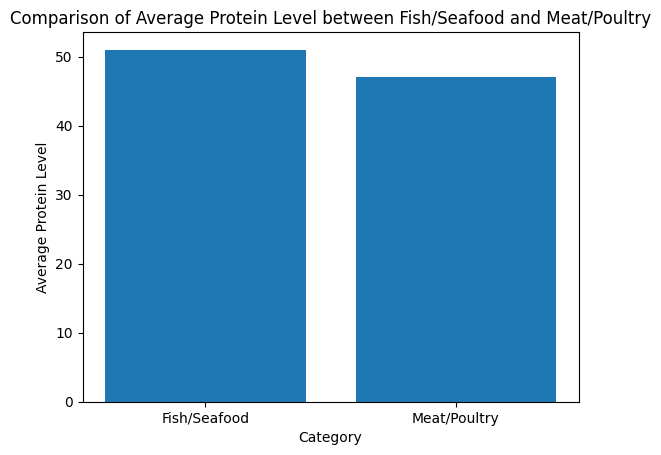

In [ ]:
# Filter the data for Fish/Seafood and Meat/Poultry categories
fish_seafood_df = df[df['Category1'].isin(['Fish', 'Seafood'])]
meat_poultry_df = df[df['Category1'].isin(['Meat', 'Poultry'])]

# Calculate the average protein level for each category
avg_protein_fish_seafood = fish_seafood_df['Protein'].mean()
avg_protein_meat_poultry = meat_poultry_df['Protein'].mean()

# Generate a bar chart to compare the average protein level between Fish/Seafood and Meat/Poultry
plt.bar(['Fish/Seafood', 'Meat/Poultry'], [avg_protein_fish_seafood, avg_protein_meat_poultry])
plt.xlabel('Category')
plt.ylabel('Average Protein Level')
plt.title('Comparison of Average Protein Level between Fish/Seafood and Meat/Poultry')
plt.show()

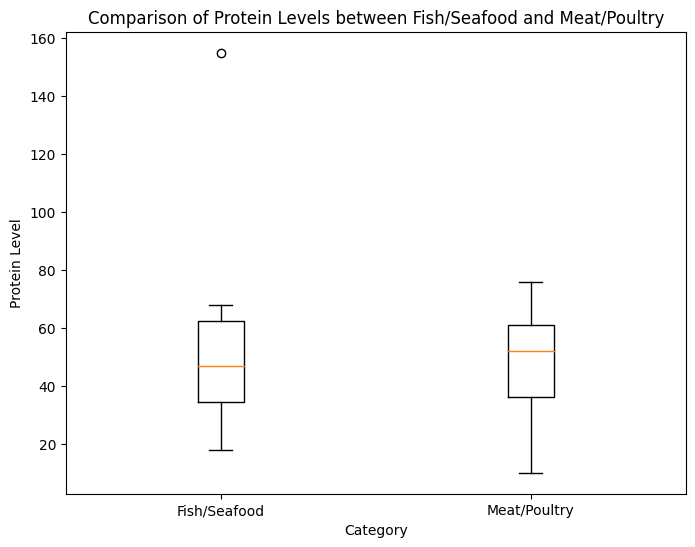

t_stat 0.5861105024906267
p-value 0.5606663468336223
There is no statistically significant difference in protein levels between Fish/Seafood and Meat/Poultry categories (p-value >= 0.05)


In [ ]:
import scipy.stats as stats
# Filter the data for Fish/Seafood and Meat/Poultry categories
fish_seafood_df = df[df['Category1'].isin(['Fish', 'Seafood'])]
meat_poultry_df = df[df['Category1'].isin(['Meat', 'Poultry'])]

# Generate box plots to compare the protein levels between Fish/Seafood and Meat/Poultry
plt.figure(figsize=(8, 6))
plt.boxplot([fish_seafood_df['Protein'], meat_poultry_df['Protein']], labels=['Fish/Seafood', 'Meat/Poultry'])
plt.xlabel('Category')
plt.ylabel('Protein Level')
plt.title('Comparison of Protein Levels between Fish/Seafood and Meat/Poultry')
plt.show()

# Perform t-test to determine if there is a statistically significant difference
t_stat, p_value = stats.ttest_ind(fish_seafood_df['Protein'], meat_poultry_df['Protein'])
alpha = 0.05 # significance level
print("t_stat",t_stat)
print("p-value",p_value)

# Interpret the results
if p_value < alpha:
    print('There is a statistically significant difference in protein levels between Fish/Seafood and Meat/Poultry categories (p-value < 0.05)')
else:
    print('There is no statistically significant difference in protein levels between Fish/Seafood and Meat/Poultry categories (p-value >= 0.05)')

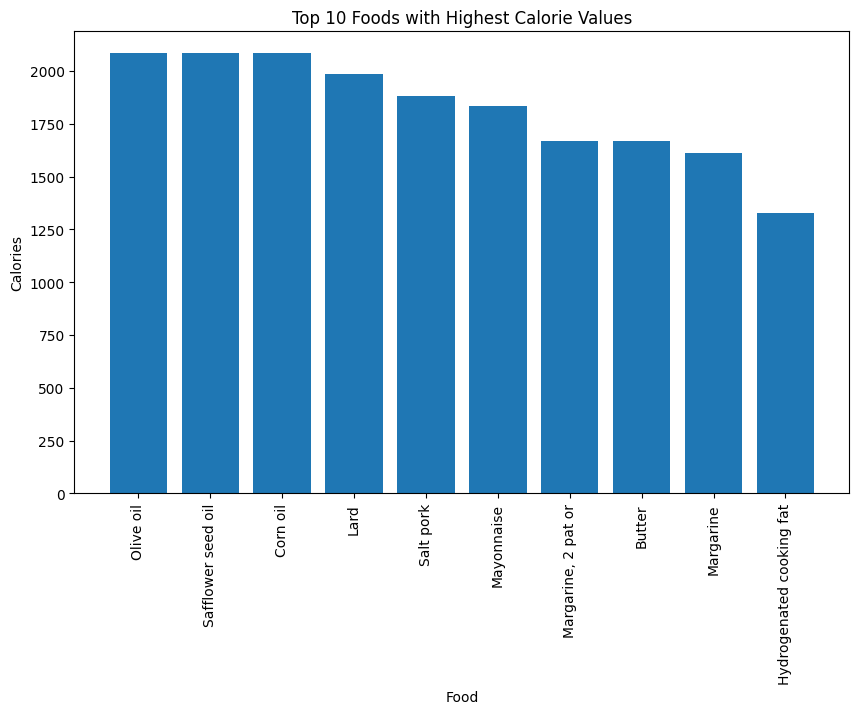

In [ ]:

# Sort the DataFrame by calorie values in descending order
df_sorted = df.sort_values('Calories', ascending=False)

# Extract the top 10 foods with the highest calorie values
top_10_foods = df_sorted.head(10)

# Create a bar chart to visualize the calorie values of the top 10 foods
plt.figure(figsize=(10, 6))
plt.bar(top_10_foods['Food'], top_10_foods['Calories'])
plt.xlabel('Food')
plt.ylabel('Calories')
plt.title('Top 10 Foods with Highest Calorie Values')
plt.xticks(rotation=90)
plt.show()

       Calories  Protein  Fat  Sat.Fat  Fiber  Carbs
count       0.0      0.0  0.0      0.0    0.0    0.0
mean        NaN      NaN  NaN      NaN    NaN    NaN
std         NaN      NaN  NaN      NaN    NaN    NaN
min         NaN      NaN  NaN      NaN    NaN    NaN
25%         NaN      NaN  NaN      NaN    NaN    NaN
50%         NaN      NaN  NaN      NaN    NaN    NaN
75%         NaN      NaN  NaN      NaN    NaN    NaN
max         NaN      NaN  NaN      NaN    NaN    NaN


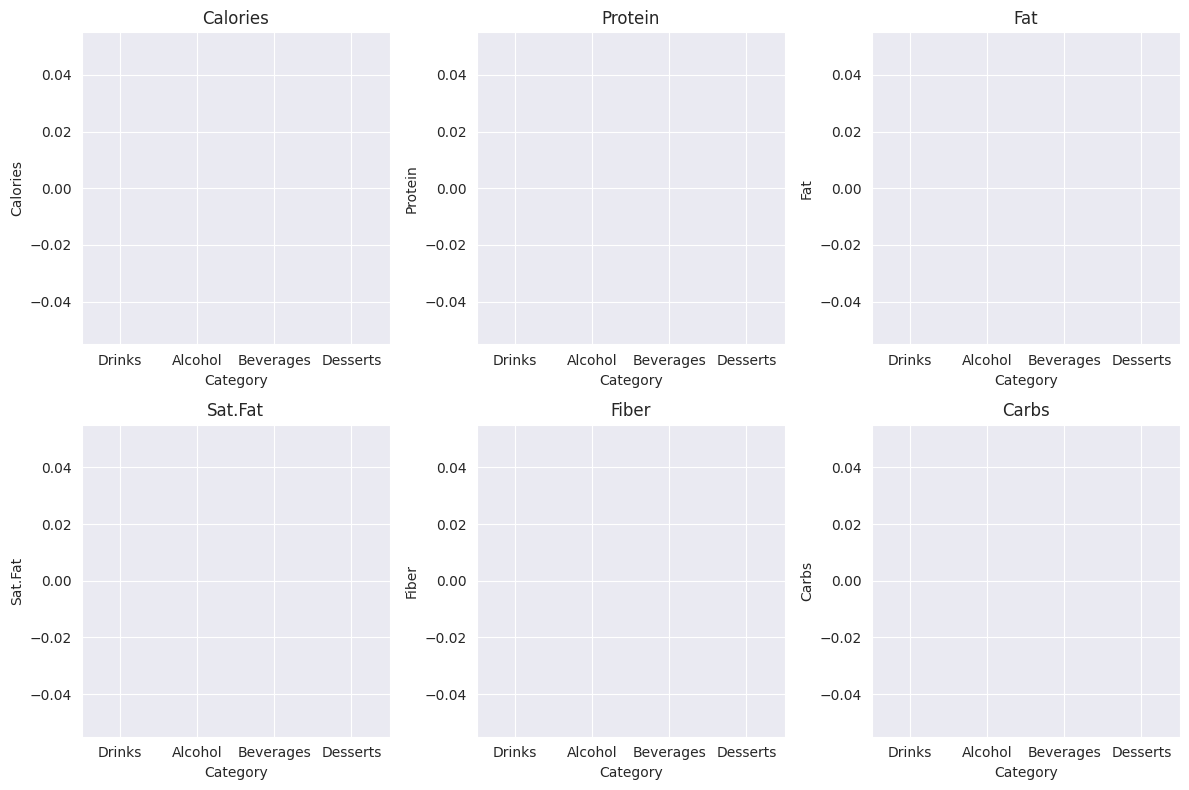

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


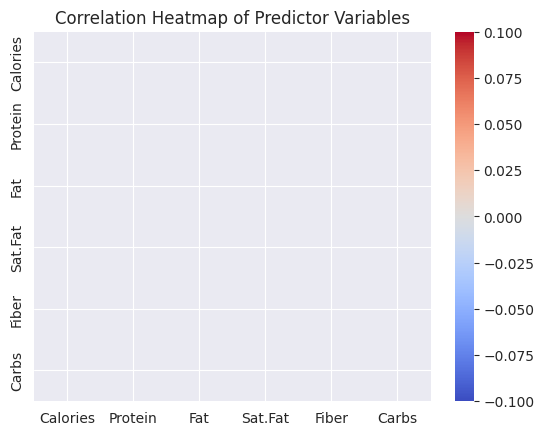

In [ ]:
# Filter the DataFrame to only include rows with 'Category' equal to 'Drinks', 'Alcohol', 'Beverages', or 'Desserts'
drinks_alcohol_beverages_desserts_df = df[df['Category'].isin(['Drinks', 'Alcohol', 'Beverages', 'Desserts'])]
# Calculate descriptive statistics for the predictor variables
descriptive_stats = drinks_alcohol_beverages_desserts_df[['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']].describe()
print(descriptive_stats)
import matplotlib.pyplot as plt

# Create box plots for the predictor variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']):
    ax = axes[i]
    ax.boxplot([drinks_alcohol_beverages_desserts_df[drinks_alcohol_beverages_desserts_df['Category'] == 'Drinks'][col],
                drinks_alcohol_beverages_desserts_df[drinks_alcohol_beverages_desserts_df['Category'] == 'Alcohol'][col],
                drinks_alcohol_beverages_desserts_df[drinks_alcohol_beverages_desserts_df['Category'] == 'Beverages'][col],
                drinks_alcohol_beverages_desserts_df[drinks_alcohol_beverages_desserts_df['Category'] == 'Desserts'][col]],
                labels=['Drinks', 'Alcohol', 'Beverages', 'Desserts'])
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()
import seaborn as sns

# Calculate the correlations between the predictor variables
corr = drinks_alcohol_beverages_desserts_df[['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()


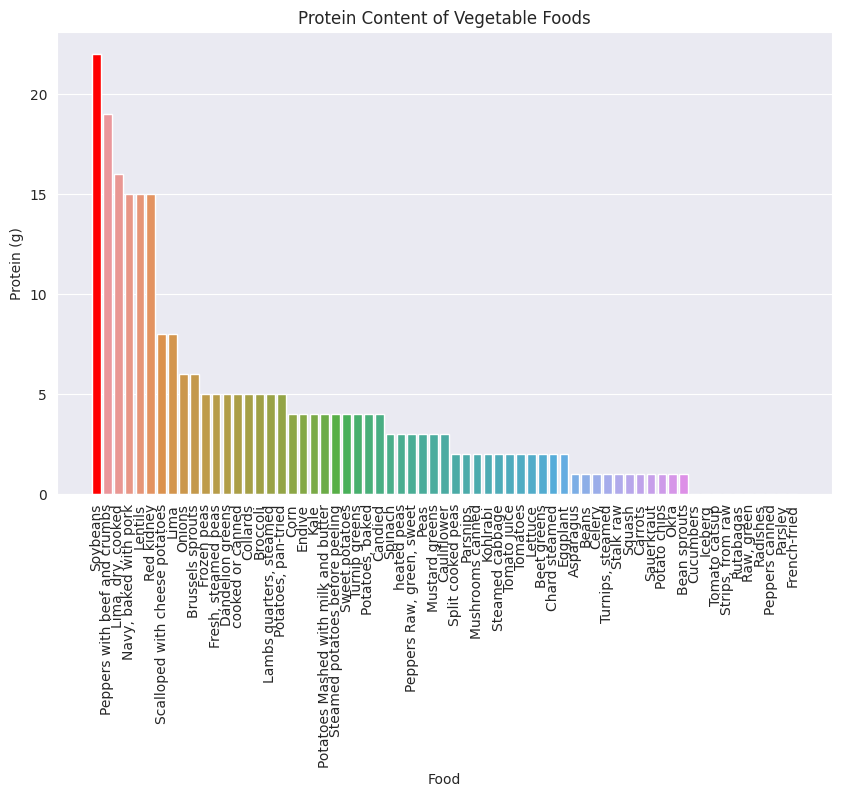

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and the category column is named 'Category' 
# and the protein column is named 'Protein'

# Filter the dataframe to only include rows with 'Category' equal to 'Vegetables'
vegetable_df = df[df['Category1'] == 'Vegetables']

# Sort the vegetable_df by 'Protein' column in descending order
vegetable_df = vegetable_df.sort_values('Protein', ascending=False)

# Create a bar chart to visualize the protein content of different vegetable foods
plt.figure(figsize=(10, 6))
sns.barplot(x='Food', y='Protein', data=vegetable_df)
plt.xlabel('Food')
plt.ylabel('Protein (g)')
plt.title('Protein Content of Vegetable Foods')
plt.xticks(rotation=90)

# Highlight the most protein-rich food with a different color
most_protein_rich_food = vegetable_df.iloc[0]
plt.bar(most_protein_rich_food['Food'], most_protein_rich_food['Protein'], color='red')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and the category column is named 'Category' 
# and the calorie column is named 'Calories'

# Filter the dataframe to only include rows with 'Category' equal to 'Grains'
grains_df = df[df['Category4'] == 'Grains']

# Sort the grains_df by 'Calories' column in descending order
grains_df = grains_df.sort_values('Calories', ascending=False)

# Identify the grain food with the highest calorie content
most_calorie_rich_food = grains_df.iloc[0]['Food']

# Create a bar chart to visualize the calorie content of different grain foods
plt.figure(figsize=(10, 6))
sns.barplot(x='Food', y='Calories', data=grains_df)
plt.xlabel('Food')
plt.ylabel('Calories')
plt.title('Calorie Content of Grain Foods')
plt.xticks(rotation=90)

# Highlight the most calorie-rich food with a different color
most_calorie_rich_index = grains_df[grains_df['Food'] == most_calorie_rich_food].index[0]
plt.bar(most_calorie_rich_food, grains_df.iloc[most_calorie_rich_index]['Calories'], color='red')

plt.show()


IndexError: ignored

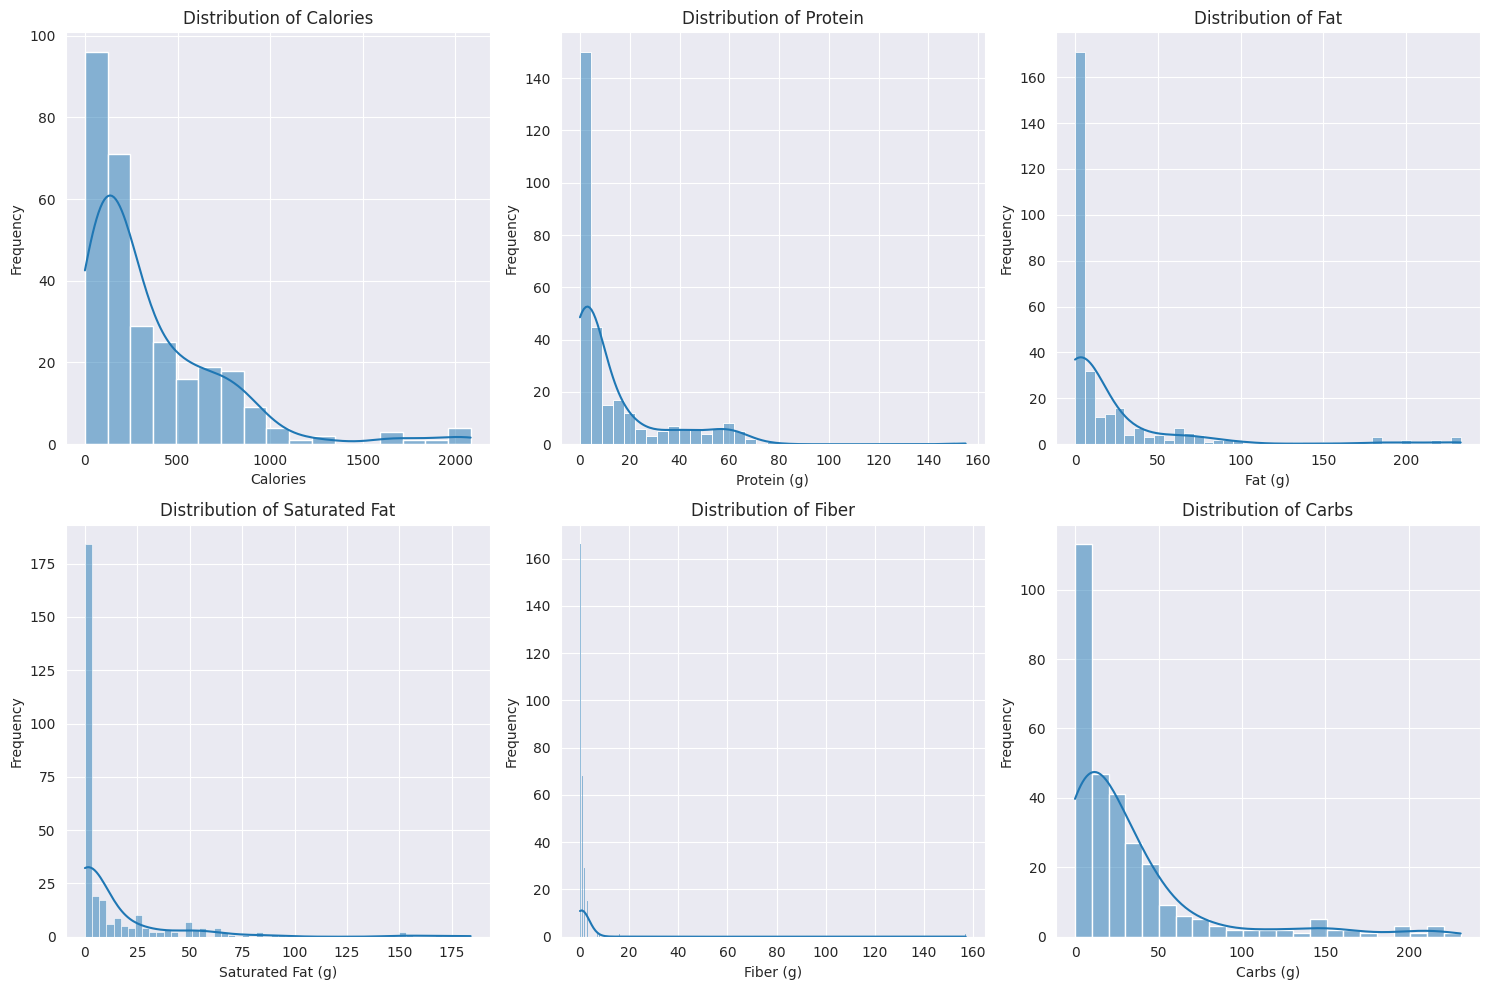

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set the style for the plots
sns.set_style('darkgrid')

# Create a figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Calories
sns.histplot(df['Calories'], kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Calories')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Calories')

# Plot 2: Protein
sns.histplot(df['Protein'], kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Protein (g)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Protein')

# Plot 3: Fat
sns.histplot(df['Fat'], kde=True, ax=axes[0, 2])
axes[0, 2].set_xlabel('Fat (g)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Fat')

# Plot 4: Saturated Fat
sns.histplot(df['Sat.Fat'], kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Saturated Fat (g)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Saturated Fat')

# Plot 5: Fiber
sns.histplot(df['Fiber'], kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Fiber (g)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Fiber')

# Plot 6: Carbs
sns.histplot(df['Carbs'], kde=True, ax=axes[1, 2])
axes[1, 2].set_xlabel('Carbs (g)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Carbs')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:

# Calculate descriptive statistics
calories_stats = df['Calories'].describe()
protein_stats = df['Protein'].describe()
fat_stats = df['Fat'].describe()
saturated_fat_stats = df['Sat.Fat'].describe()
fiber_stats = df['Fiber'].describe()
carbs_stats = df['Carbs'].describe()

# Print the descriptive statistics
print("Descriptive Statistics for Calories:")
print(calories_stats)
print("\nDescriptive Statistics for Protein:")
print(protein_stats)
print("\nDescriptive Statistics for Fat:")
print(fat_stats)
print("\nDescriptive Statistics for Saturated Fat:")
print(saturated_fat_stats)
print("\nDescriptive Statistics for Fiber:")
print(fiber_stats)
print("\nDescriptive Statistics for Carbs:")
print(carbs_stats)

Descriptive Statistics for Calories:
count     299.000000
mean      360.662207
std       389.068828
min         0.000000
25%       100.000000
50%       220.000000
75%       522.500000
max      2083.000000
Name: Calories, dtype: float64

Descriptive Statistics for Protein:
count    299.000000
mean      13.454849
std       20.124290
min        0.000000
25%        1.000000
50%        4.000000
75%       16.000000
max      155.000000
Name: Protein, dtype: float64

Descriptive Statistics for Fat:
count    299.000000
mean      20.575251
std       42.773128
min        0.000000
25%        0.000000
50%        2.000000
75%       20.000000
max      233.000000
Name: Fat, dtype: float64

Descriptive Statistics for Saturated Fat:
count    299.000000
mean      13.217391
std       28.653383
min        0.000000
25%        0.000000
50%        0.000000
75%       11.500000
max      184.000000
Name: Sat.Fat, dtype: float64

Descriptive Statistics for Fiber:
count    299.000000
mean       1.458194
std       